In [64]:
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Vetorização
from sklearn.feature_extraction.text import CountVectorizer

# Transf. Matriz Sparse em DataFrame

# 
import nltk
#nltk.download("all")

# Tokenização
from nltk import tokenize

# Correção das palavras: 
from textblob import TextBlob



In [2]:
df_raw = pd.read_csv('googlestore.csv')

In [3]:
df_raw.head()

,reviewId,app_name,content,sentiment_polarity,sentiment
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shope razoá apes fácil utiliz apresent alg...,positive,sadness
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimiz fácil visual produt ped rastrei...,positive,sadness
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prát fácil entend porém algum vend man...,positive,sadness
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplic bom alg chate bast fat pesquis produt co...,positive,sadness
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tid dificuldad pag cart crédit a...,negative,disgust


In [4]:
df_raw['app_name'].value_counts()

app_name
Shopee                            303
Instagram                         302
Whatsapp Messenger                302
Nubank                            301
Canva: Desenho, Fotos e Vídeos    301
CapCut - Editor de Vídeos         301
gov.br                            301
SHEIN                             300
Tiktok Lite                       300
Photo&File Detect                 300
Name: count, dtype: int64

In [5]:
X = df_raw['content']
y = df_raw['sentiment_polarity']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y
)

In [7]:
clf_rf = LogisticRegression()
clf_rf = clf_rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'bom acab instal'

In [7]:
acuracia = clf_rf

NameError: name 'clf_rf' is not defined

In [8]:
print('Negativa \n')
print(df_raw['content'][1000])

Negativa 

der limit crédit ent tud ótim efetu pag ant dat hoj efet pag fatur abaix limit vc cont val crédit faz cois efetu pag cad limit total chate


In [9]:
print(y.value_counts())

sentiment_polarity
negative    1742
positive    1187
neutral       82
Name: count, dtype: int64


In [10]:
classificacao = df_raw['sentiment_polarity'].replace(["negative", "positive", "neutral"], [-1, 1, 0])

C:\Users\Yago\AppData\Local\Temp\ipykernel_7484\2991047978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = df_raw['sentiment_polarity'].replace(["negative", "positive", "neutral"], [-1, 1, 0])


In [11]:
df_raw['classificacao'] = classificacao

In [12]:
#df_raw.head()

In [13]:
df_raw['content'].isna().sum()


1

In [14]:
df_raw['content'] = df_raw['content'].fillna('')


In [15]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df_raw['content'])

In [16]:
vetorizar.get_feature_names_out()

array(['aap', 'aba', 'abaix', ..., 'únic', 'útel', 'útil'], dtype=object)

In [17]:
bag_of_words

# Matriz sparse: É uma matriz grande, onde a maioria dos valores sendo zero, logo 
# o espaço de memória requesitado é muito alto.

<3011x4260 sparse matrix of type '<class 'numpy.int64'>'
	with 75957 stored elements in Compressed Sparse Row format>

In [18]:
# Transf. Matriz Sparse em DataFrame
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words, 
    columns=vetorizar.get_feature_names_out()
)

In [19]:
print(bag_of_words.shape)
# cada frase foi representada com um vetor de 4260


(3011, 4260)


In [20]:
matriz_esparsa

,aap,aba,abaix,abal,abandon,abat,abb,abenço,aberr,abert,...,ódi,ópt,órg,ótim,ônibu,últ,últim,únic,útel,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# otimização:
vetorizar = CountVectorizer(lowercase=False,
                            max_features=100)
bag_of_words = vetorizar.fit_transform(df_raw['content'])
print(bag_of_words.shape)

(3011, 100)


In [22]:
# Transf. Matriz Sparse em DataFrame
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words, 
    columns=vetorizar.get_feature_names_out()
)
matriz_esparsa

,abr,acess,ach,agor,aind,algum,ant,aparec,aplic,app,...,us,uso,val,vc,ver,vez,vou,víde,áudi,ótim
0,0,1,0,0,0,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,2,0,3,...,0,0,0,0,1,1,0,0,0,0
2,1,0,0,0,1,1,0,0,0,3,...,1,0,0,0,0,2,0,0,0,1
3,0,0,1,0,0,0,0,2,1,0,...,0,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3008,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,1,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = bag_of_words
y = df_raw['classificacao']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42
                                                    #stratify=y
)

clf_rf = LogisticRegression()
clf_rf = clf_rf.fit(X_train, y_train)

acuracia = clf_rf.score(X_test, y_test)
print(acuracia)

0.8087649402390438


In [24]:
def classificacao_texto(df, coluna_texto, coluna_alvo):
    vetorizar = CountVectorizer(lowercase=False,
                                max_features=100)
    
    bag_of_words = vetorizar.fit_transform(df[coluna_texto])
    print(bag_of_words.shape)  # (n_linhas, n_features)
    print(df[coluna_alvo].shape) 
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                        df[coluna_alvo],
                                                        random_state=42
                                                        #stratify=y
                                                         )
    clf_rf = LogisticRegression()
    clf_rf = clf_rf.fit(X_train, y_train)

    acuracia = clf_rf.score(X_test, y_test)
    return print(acuracia)

In [25]:
df_raw.columns

Index(['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment',
       'classificacao'],
      dtype='object')

In [26]:
print(classificacao_texto(df_raw, 'content', 'classificacao'))

(3011, 100)
(3011,)
0.8087649402390438
None


In [27]:
# wordcloud
%matplotlib inline
from wordcloud import WordCloud


In [28]:
todas_palavras = ([texto for texto in df_raw['content']])


In [29]:
todas_palavras = ' '.join([texto for texto in df_raw['content']])


In [30]:
len(todas_palavras)

482636

In [31]:
nuvem_palavras = WordCloud(width = 800, height = 500,
                           max_font_size = 110,
                           collocations = False).generate(todas_palavras)


# bigrama e eu quero da palavra mesmo

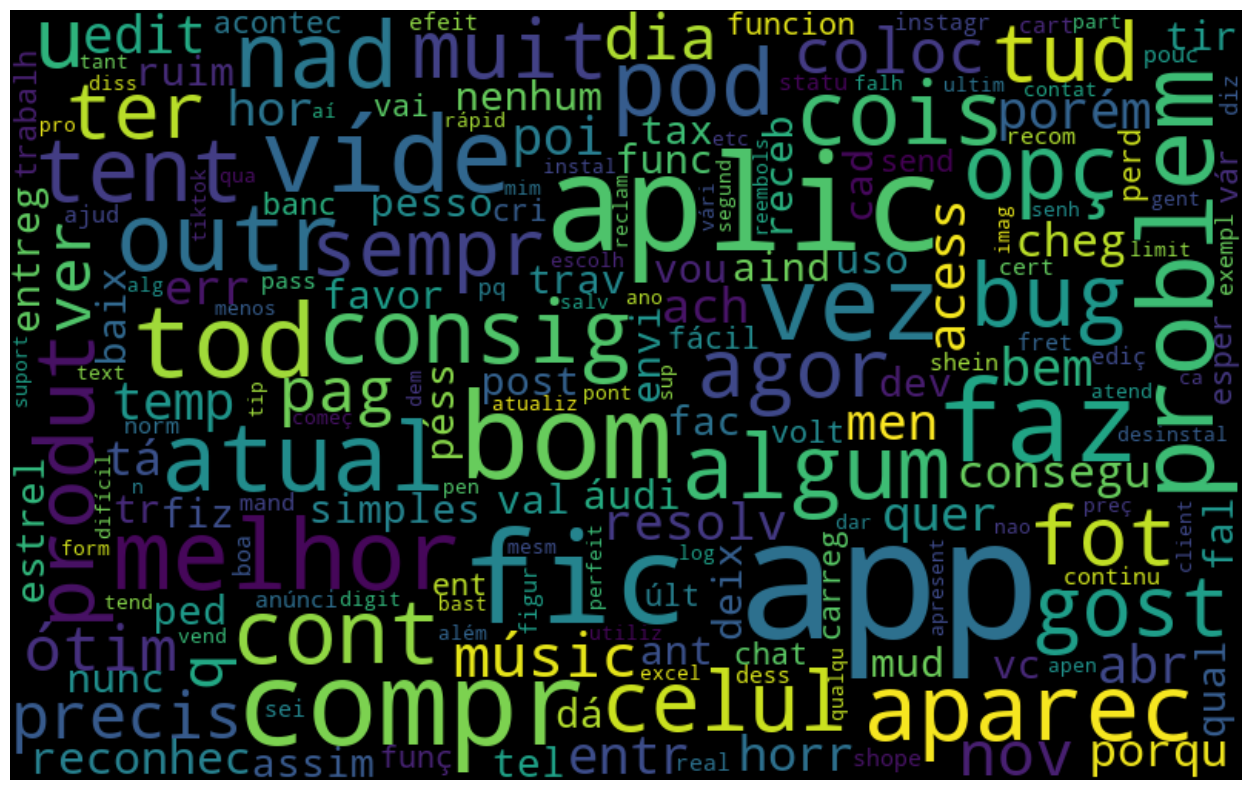

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18 , 10))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [33]:
df_raw.columns

Index(['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment',
       'classificacao'],
      dtype='object')

In [34]:
df_raw['sentiment_polarity'].value_counts

<bound method IndexOpsMixin.value_counts of 0       positive
1       positive
2       positive
3       positive
4       negative
          ...   
3006    negative
3007    negative
3008    negative
3009    negative
3010    negative
Name: sentiment_polarity, Length: 3011, dtype: object>

In [35]:
# Criando separadamente
df_raw.query("sentiment_polarity == 'positive'")

,reviewId,app_name,content,sentiment_polarity,sentiment,classificacao
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shope razoá apes fácil utiliz apresent alg...,positive,sadness,1
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimiz fácil visual produt ped rastrei...,positive,sadness,1
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prát fácil entend porém algum vend man...,positive,sadness,1
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplic bom alg chate bast fat pesquis produt co...,positive,sadness,1
5,2ce2db50-eec3-4cf5-afd6-b153ca01cf0f,Shopee,bom app porém fic trav pouc hor conclu compr a...,positive,happiness,1
...,...,...,...,...,...,...
2874,99e1529d-5f58-4e5c-b849-064b2f4b76be,gov.br,ótim aplic dic ativ verific dua etap muit vez ...,positive,sadness,1
2875,79365550-257b-4f32-823c-ee59e3ad34c5,gov.br,aplic si bom bem elabor fic bem complic faz re...,positive,sadness,1
2956,00fcfd82-a1f1-40b3-8a6a-8affa7084003,gov.br,bom excel bom gost recom tod quant precis obt ...,positive,happiness,1
2966,b2f59e21-f407-43df-8046-2b295fe879f4,gov.br,bom pod inclu tod document inclusiv certida na...,positive,sadness,1


In [36]:
def nuvem_palavras_neg(df, coluna_texto):
    texto_negativo = df[df["sentiment_polarity"] == "negative"]  # Correção aqui
    todas_palavras = ' '.join(texto_negativo[coluna_texto].dropna())  # Removendo valores NaN, se houver

    nuvem_palavras = WordCloud(
        width=800, height=500, max_font_size=110, collocations=False
    ).generate(todas_palavras)

    plt.figure(figsize=(18, 10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [37]:
def nuvem_palavras_pos(df, coluna_texto):
    texto_positivo = df[df["sentiment_polarity"] == "positive"]  # Correção aqui
    todas_palavras = ' '.join(texto_positivo[coluna_texto].dropna())  # Removendo valores NaN, se houver

    nuvem_palavras = WordCloud(
        width=800, height=500, max_font_size=110, collocations=False
    ).generate(todas_palavras)

    plt.figure(figsize=(18, 10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()


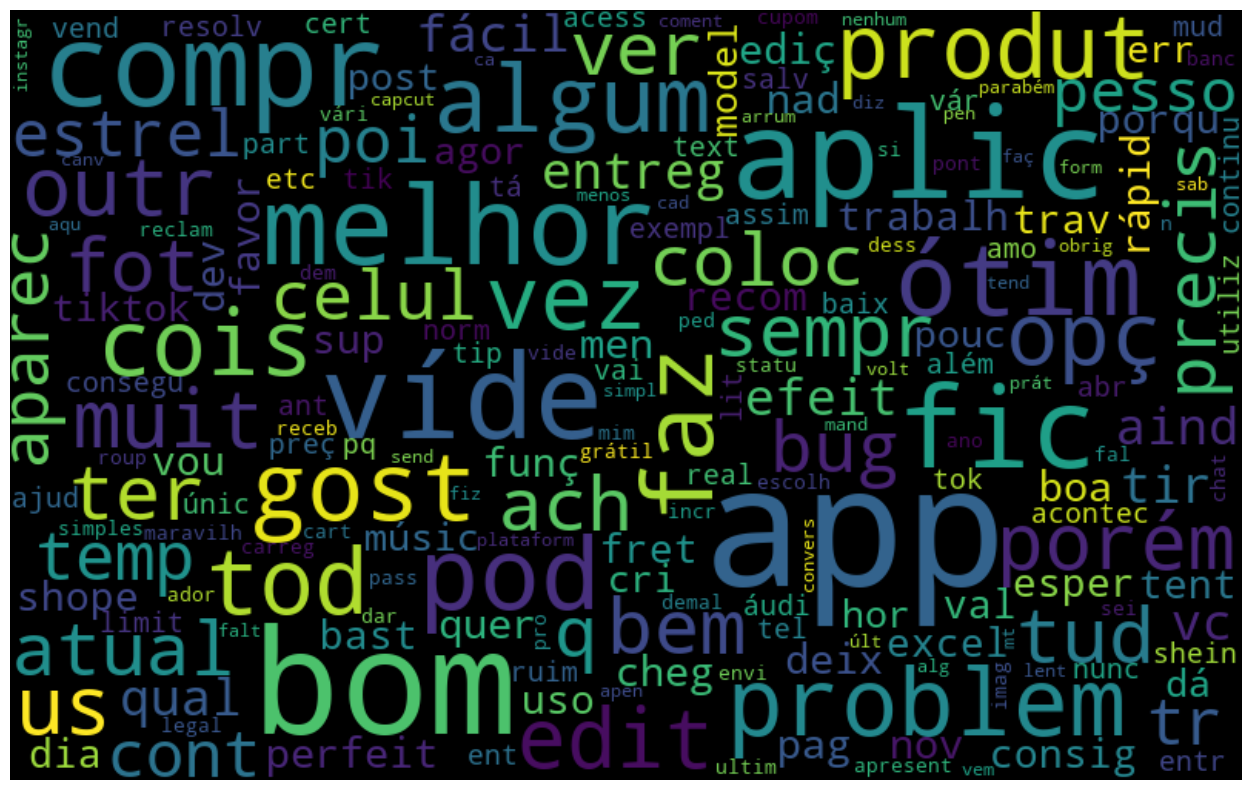

In [38]:
nuvem_palavras_pos(df_raw, 'content')

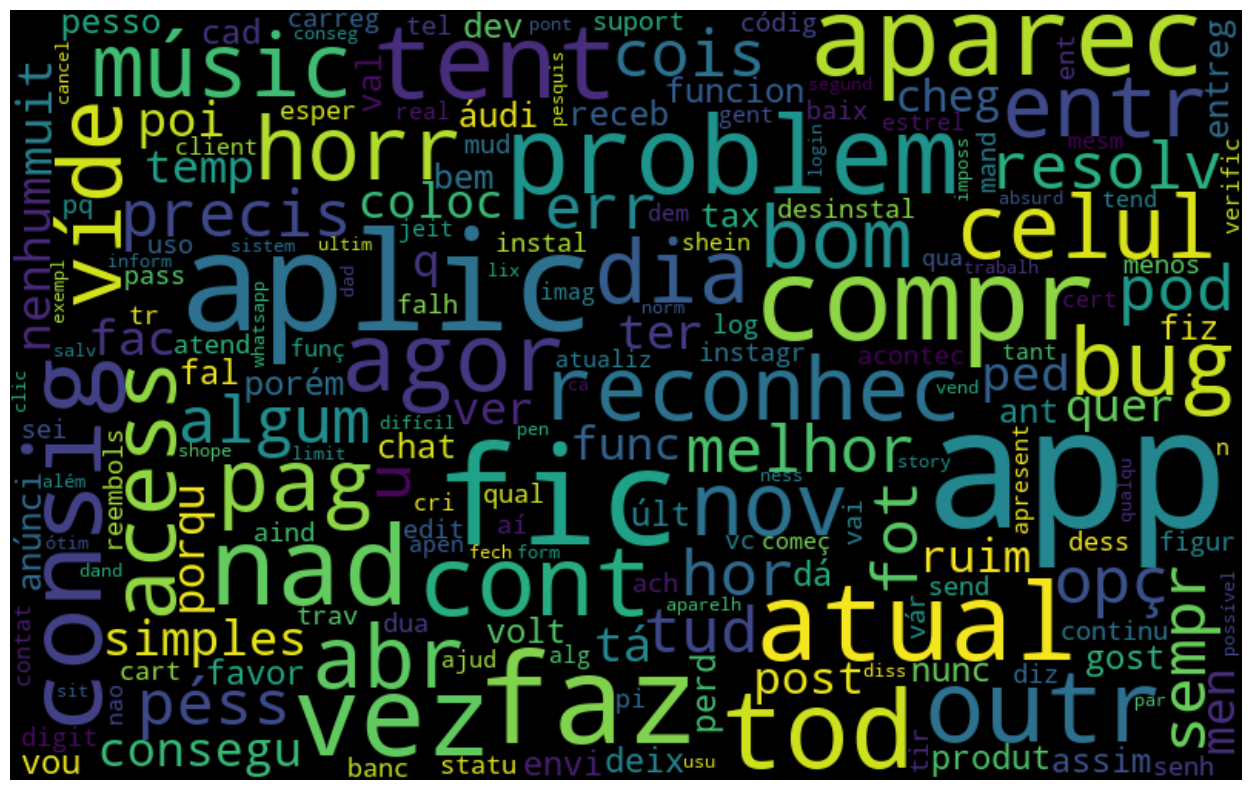

In [39]:
nuvem_palavras_neg(df_raw, 'content')

In [41]:
frase = ["um filme ruim", "um filme bom"]

frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [43]:
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()

token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [47]:
token_todas_palavras = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_todas_palavras)

df_freq = pd.DataFrame({
    "Palavra": list(frequencia.keys()),
    "Frequencia": list(frequencia.values())
})


In [51]:
df_freq.head()

,Palavra,Frequencia
0,app,2055
1,shope,161
2,razoá,7
3,apes,30
4,fácil,178


In [50]:
df_freq.nlargest(columns="Frequencia", n = 10)

,Palavra,Frequencia
0,app,2055
92,aplic,1200
138,fic,1045
66,bom,931
104,compr,896
68,faz,834
177,víde,710
55,vez,687
34,problem,682
221,tod,664


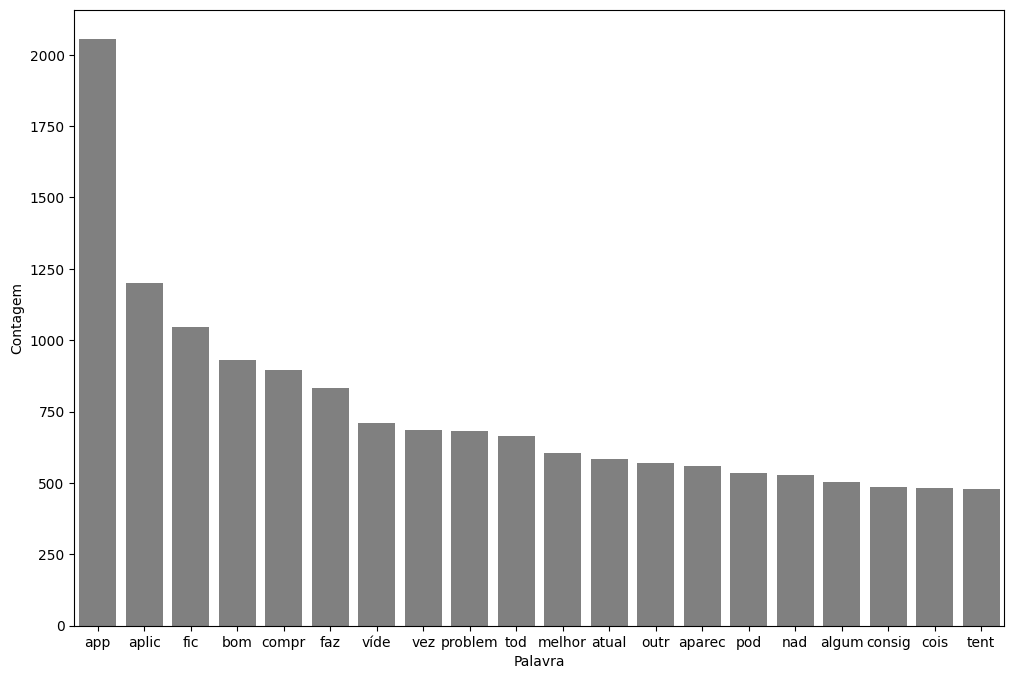

In [56]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = df_freq.nlargest(columns="Frequencia", n = 20), x = "Palavra", y = "Frequencia", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

In [57]:
df_raw.columns

Index(['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment',
       'classificacao'],
      dtype='object')

In [106]:
def grafico_pareto(df, coluna_texto, quantidade):
    todas_palavras = ' '.join((texto for texto in df[coluna_texto]))

    token_todas_palavras = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_todas_palavras)

    df_freq = pd.DataFrame({
        "Palavra": list(frequencia.keys()),
        "Frequencia": list(frequencia.values())
    })

    df_freq = df_freq.nlargest(columns="Frequencia", n = quantidade)

    plt.figure(figsize = (12, 8))
    ax = sns.barplot(data = df_freq, x = "Palavra", y = "Frequencia", color = 'gray')
    ax.set(ylabel = "Contagem")

    plt.xticks(rotation=45)  # Gira os rótulos do eixo X em 90°
    plt.show()


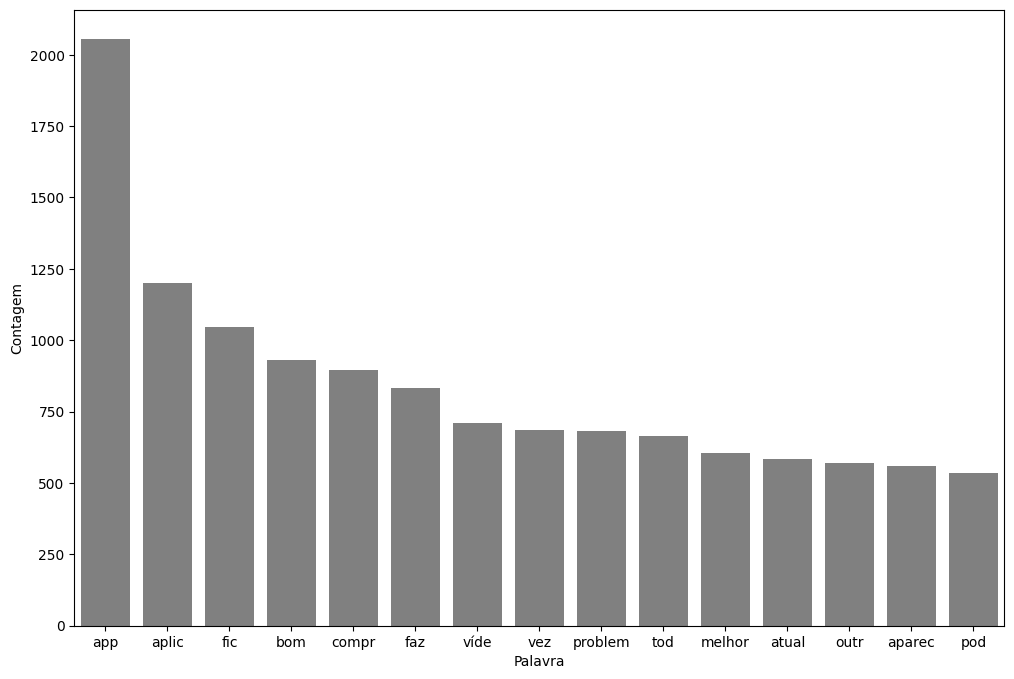

In [60]:
grafico_pareto(df_raw, 'content', 15)

In [61]:
palavras_irrelevantes =nltk.corpus.stopwords.words("portuguese")

In [63]:
df_raw.head()

,reviewId,app_name,content,sentiment_polarity,sentiment,classificacao
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shope razoá apes fácil utiliz apresent alg...,positive,sadness,1
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimiz fácil visual produt ped rastrei...,positive,sadness,1
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prát fácil entend porém algum vend man...,positive,sadness,1
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplic bom alg chate bast fat pesquis produt co...,positive,sadness,1
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tid dificuldad pag cart crédit a...,negative,disgust,-1


In [65]:
def corrigir_texto(texto):
    return str(TextBlob(texto).correct())

df_raw["content_corrigido"] = df_raw["content"].apply(corrigir_texto)

In [66]:
df_raw.head()

,reviewId,app_name,content,sentiment_polarity,sentiment,classificacao,content_corrigido
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shope razoá apes fácil utiliz apresent alg...,positive,sadness,1,pp hope razor apes fail utilize present album ...
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimiz fácil visual produt ped rastrei...,positive,sadness,1,pp be timid fail visual product red castres in...
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prát fácil entend porém algum vend man...,positive,sadness,1,pp boy part fail extend form album end and pro...
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplic bom alg chate bast fat pesquis produt co...,positive,sadness,1,april boy all hate bast fat pesquis product co...
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tid dificuldad pag cart crédit a...,negative,disgust,-1,pp boy form did dificuldad pay cart credit ape...


In [68]:
import nltk
from nltk.tokenize import WhitespaceTokenizer

nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("portuguese")
token_espaco = WhitespaceTokenizer()

frase_processada = []

for opiniao in df_raw["content"]:
    nova_frase = []
    palavras_texto = token_espaco.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

# Agora a lista tem o mesmo tamanho do DataFrame
df_raw["tratamento_1"] = frase_processada


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
df_raw['content'].head(100)

0     app shope razoá apes fácil utiliz apresent alg...
1     app bem otimiz fácil visual produt ped rastrei...
2     app bom prát fácil entend porém algum vend man...
3     aplic bom alg chate bast fat pesquis produt co...
4     app bom porém tid dificuldad pag cart crédit a...
                            ...                        
95    moment sid experi posi gost tud compr it probl...
96    aplic ate bom porém quas tod compr fiz nel vie...
97    bom muit variedad produt receb sempr compr gos...
98    boa part app func bem fácil naveg únic problem...
99    app bom além facil bast process compr pass seg...
Name: content, Length: 100, dtype: object

In [140]:
substituicoes = {
    "bast": "bastante",
    "fat": "fator",
    "cart crédit": "cartão de crédito",
    "aplic": "aplicacao",
    "fic": "fica",
    "tod": "todo",
    "outr": "outro",
    "pod": "pode",
    "aparec": "aparece",
    "nad"   : "nada",
    "opç"   : "opcao",
    "celul" : "celular",
    "gost"  : "gostar",
    "consig": "consigo",
    "us"    : "usar",
    "tud"   : "tudo",
    "produt": "produto",
    "sempr" : "sempre",
    "precis": 'preciso',
    "nov"   : "nova",
    "ótim"  : "otimo", 
    "pag"   : "pagina",
    "coloc" : "coloca",
    "músic" : "musica"
}

def corrigir_palavras(texto):
    for palavra_cortada, palavra_completa in substituicoes.items():
        texto = texto.replace(palavra_cortada, palavra_completa)
    return texto

df_raw["content_corrigido"] = df_raw["content"].apply(corrigir_palavras)


In [ ]:
"consig": "consigo",
    "opç"   : "opcao",
    "celul" : "celular",
    "gost"  : "gostar",
    "us"    : "usar",
   # "muit"  : "muito",
    "tud"   : "tudo",
    "produt": "produto",
    "sempr" : "sempre",
    "precis": 'preciso',
    "nov"   : "nova",
    "ótim"  : "otimo", 
    "pag"   : "pagina",
    "coloc" : "coloca",
    "músic" : "musica"

In [141]:
import nltk
from nltk.tokenize import WhitespaceTokenizer

nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("portuguese")
token_espaco = WhitespaceTokenizer()

frase_processada = []

for opiniao in df_raw["content_corrigido"]:
    nova_frase = []
    palavras_texto = token_espaco.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

# Agora a lista tem o mesmo tamanho do DataFrame
df_raw["tratamento_1"] = frase_processada

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


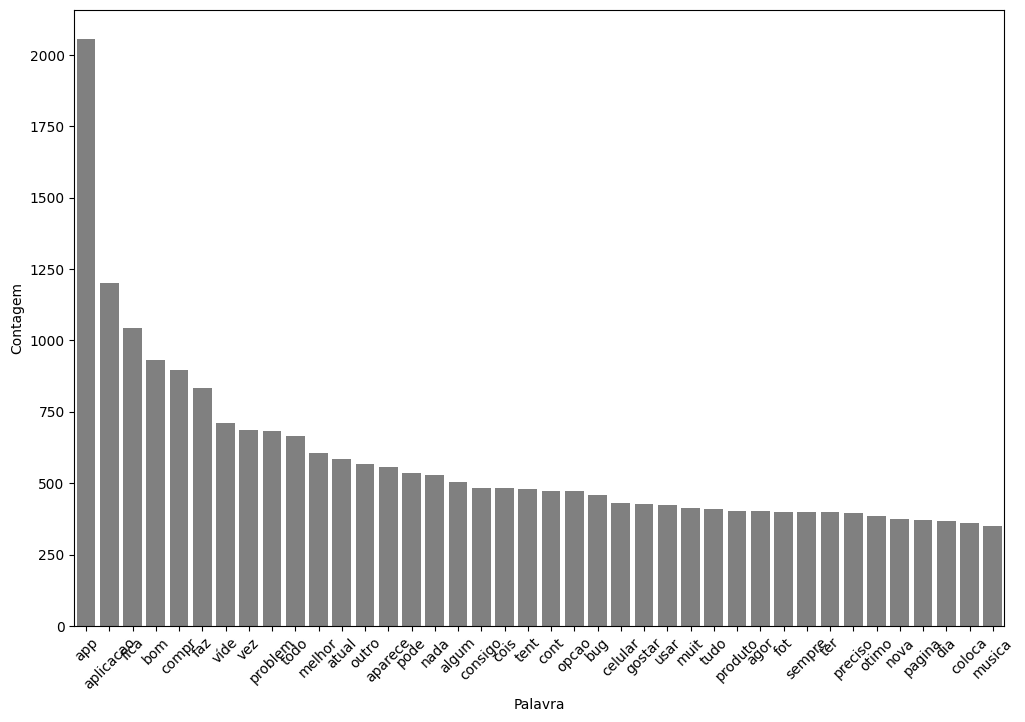

In [143]:
grafico_pareto(df_raw, 'tratamento_1', 40)

In [142]:
classificacao_texto(df_raw, "tratamento_1", "classificacao")

(3011, 100)
(3011,)
0.8114209827357237


In [144]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [148]:
from string import punctuation

pontuacao = list()

for ponto in punctuation:
    pontuacao.append(ponto)

In [151]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()

for opiniao in df_raw["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df_raw['tratamento_2'] = frase_processada

In [ ]:
df_raw[]

(3011, 100)
(3011,)
0.8114209827357237


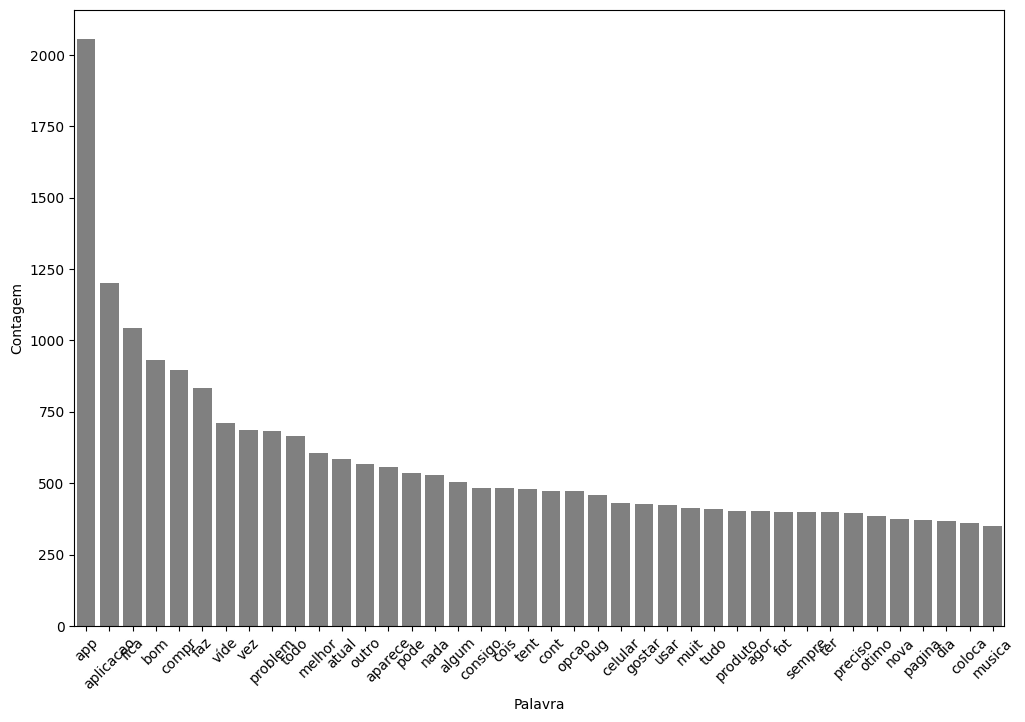

In [153]:
grafico_pareto(df_raw, 'tratamento_2', 40)

In [155]:
import unidecode

In [156]:
acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [157]:
sem_acentos = [unidecode.unidecode(texto) for texto in df_raw['tratamento_2']]

In [158]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [175]:
from nltk.tokenize import word_tokenize  # Supondo que você esteja usando nltk para tokenização


# Remover acentos dos textos
sem_acentos = [unidecode.unidecode(texto) for texto in df_raw['tratamento_2']]

# Remover acentos das stopwords
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

# Processar as frases removendo as stopwords
frase_processada = []

for opiniao in sem_acentos:
    nova_frase = []
    palavras_texto = word_tokenize(opiniao)  # Usando word_tokenize do nltk
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:  # Usando stopwords_sem_acento
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

# Atualizar a coluna do DataFrame com as frases processadas
df_raw['tratamento_3'] = frase_processada

In [176]:
classificacao_texto(df_raw, "tratamento_3", "classificacao")

(3011, 100)
(3011,)
0.8047808764940239


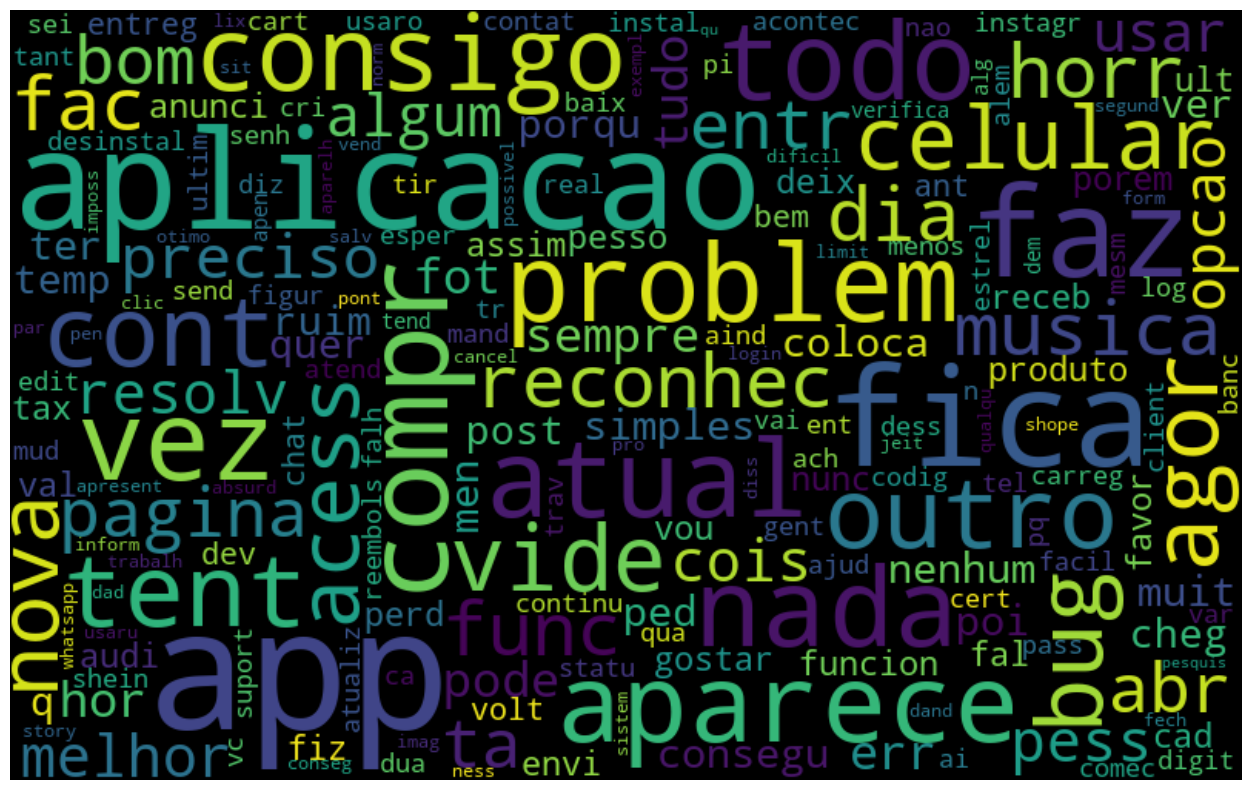

In [163]:
nuvem_palavras_neg(df_raw, "tratamento_3")

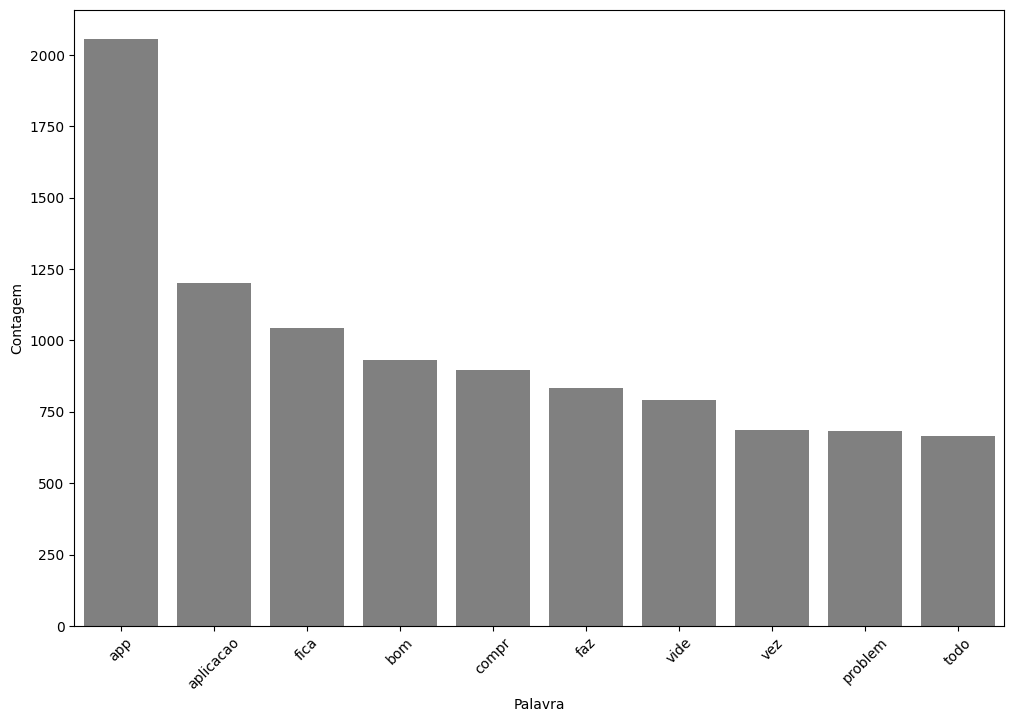

In [164]:
grafico_pareto(df_raw, "tratamento_3", 10)

In [166]:
frase = "O TESTE"
print(frase.lower())

o teste


In [183]:
frase_processada = list()

for opiniao in df_raw["tratamento_1"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df_raw['tratamento_4'] = frase_processada

In [184]:
classificacao_texto(df_raw, "tratamento_4", "classificacao")

(3011, 100)
(3011,)
0.8114209827357237
